## 1. 

#### Load the data using pandas, which location has the most active users based on total posts?. What is the total number of posts in this location?

In [1]:
import pandas as pd

df = pd.read_csv('social_media.csv')
df

,username,age,gender,location,followers,posts,friends
0,user1,28,male,Philadelphia,5493,56,605
1,user2,22,female,Los Angeles,9530,25,683
2,user3,22,male,Philadelphia,7200,20,100
3,user4,32,female,New York,7164,90,364
4,user5,33,male,San Diego,4034,44,624
5,user6,27,male,Phoenix,1389,58,765
6,user7,28,male,Phoenix,1937,25,923
7,user8,34,female,Dallas,5344,70,452
8,user9,34,female,Chicago,8655,51,980
9,user10,27,female,Los Angeles,9825,60,575


In [2]:
# Group the data by location and sum the number of posts per location
location_counts = df.groupby('location').sum()['posts']

# Find the location with the maximum number of posts
most_active_loc = location_counts.idxmax()
print(f'The most active location based on posts is {most_active_loc}')
print(f'The total number of posts is {location_counts.max()}')

The most active location based on posts is New York
The total number of posts is 90


## 2. 

#### Which gender has the least number of friends and what is the total number of friends for this gender?

In [3]:
# Group the data by gender and sum the number friends
gender_counts = df.groupby('gender').sum()['friends']

# Find the gender with the least friends
least_active_gender = gender_counts.idxmin()
print(f'The gender with the least friends is {least_active_gender}')
print(f'The total number of friends is  {gender_counts.male}')

The gender with the least friends is male
The total number of friends is  3017


## 3. 

#### What is the gender, location and age of the most active user based on posts?

In [4]:
# Finding the age of most active user based on posts
age_of_user = df.sort_values(by="posts", ascending=False).loc[:,"age"].head(1)

# Finding the gender of most active user based on posts
gender_of_user = df.sort_values(by="posts", ascending=False).loc[:,"gender"].head(1)

# Finding the city of most active user based on posts
city_of_user = df.sort_values(by="posts", ascending=False).loc[:,"location"].head(1)

print(f'The age of the most active is {age_of_user.iloc[0]}')
print(f'The gender of the most active user is {gender_of_user.iloc[0]}')
print(f'The city with the most active user is {city_of_user.iloc[0]}')

The age of the most active is 32
The gender of the most active user is female
The city with the most active user is New York


## 4. 

#### Which city has the highest number of female users?

In [5]:
# Group the data by city and gender, and count the number of users in each group
city_gender_counts = df.groupby(["location","gender"]).size(). reset_index(name = "count")

# Filter the data to only include rows with female users
female_users = city_gender_counts[city_gender_counts["gender"] == "female"]

# Find the city with the highest number of female users
most_female_users_city = female_users["count"].idxmax()

# Return the city with the highets number of female 
city = female_users.iloc[most_female_users_city]["location"]

print(f'The city with the most female users is {city}')

The city with the most female users is Los Angeles


## 5. 

#### Using a pie chart, compare the number of male and female users. Present your answer in percentages. Use Matplotlib.

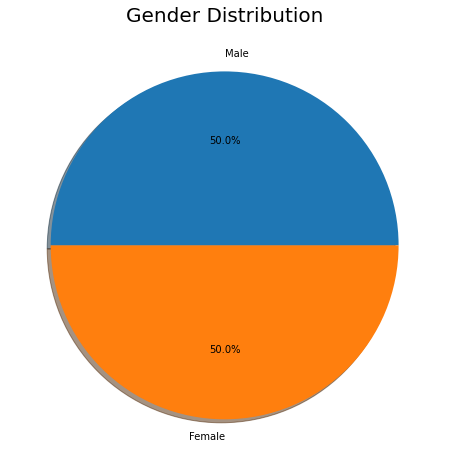

In [6]:
import matplotlib.pyplot as plt


# Count the number of male and female users
gender_counts = df['gender'].value_counts()

# Create the pie chart
plt.figure(figsize=(12,8))
plt.pie(gender_counts, labels=['Male', 'Female'], 
        autopct='%1.1f%%',
        shadow=True)

plt.title('Gender Distribution', fontsize= 20)
plt.show()